In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

df = pd.read_csv('customers.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [3]:
value_counts = df['y'].value_counts()
value_counts

y
no     39922
yes     5289
Name: count, dtype: int64

In [4]:
from imblearn.over_sampling import RandomOverSampler
input_columns = df.drop('y', axis = 1)
class_columns = df['y'] 
oversampler = RandomOverSampler(random_state=0)
input_columns_resampled, class_columns_resampled = oversampler.fit_resample(input_columns, class_columns)
df = pd.concat([input_columns_resampled, class_columns_resampled], axis = 1)


In [5]:
class_distribution = df['y'].value_counts()
class_distribution

y
no     39922
yes    39922
Name: count, dtype: int64

In [6]:
X = df.iloc[:, 0:16].values
y = df.iloc[:, -1]

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [8]:
print(y)

[0 0 0 ... 1 1 1]


In [9]:
X_job = X[:, [1]]
print(np.unique(X_job))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], sparse_threshold=0)
X_job = ct.fit_transform(X_job)
print(X_job.shape)

(79844, 12)


In [11]:
print(X_job)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [12]:
x_cat = X[:, [1,2,3,4,6,7,8,10,15]]

In [13]:
 x_cat.shape

(79844, 9)

In [14]:
orignalNumOfcols = x_cat.shape[1]

for i in range(x_cat.shape[1]):
    currNumOfCols = x_cat.shape[1]
    indexOfColumnToEncode = currNumOfCols - orignalNumOfcols + i
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [indexOfColumnToEncode])], remainder='passthrough', sparse_threshold=0)
    x_cat = ct.fit_transform(x_cat)
    

In [15]:
print(x_cat.shape)

(79844, 44)


In [16]:
x_num = X[:, [0, 5, 9, 11, 12, 13, 14]]
x = np.concatenate((x_num, x_cat), axis=1)

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=0)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))


Epoch 1/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8274 - loss: 0.3911 - val_accuracy: 0.8723 - val_loss: 0.3091
Epoch 2/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8778 - loss: 0.2972 - val_accuracy: 0.8840 - val_loss: 0.2868
Epoch 3/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8923 - loss: 0.2710 - val_accuracy: 0.8885 - val_loss: 0.2777
Epoch 4/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2537 - val_accuracy: 0.8966 - val_loss: 0.2625
Epoch 5/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9076 - loss: 0.2352 - val_accuracy: 0.9021 - val_loss: 0.2559
Epoch 6/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.2200 - val_accuracy: 0.9046 - val_loss: 0.2562
Epoch 7/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2061 - val_accuracy: 0.9043 - val_loss: 0.2493
Epoch 8/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0

In [20]:
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))

Epoch 1/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7979 - loss: 0.4368 - val_accuracy: 0.8666 - val_loss: 0.3246
Epoch 2/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8680 - loss: 0.3219 - val_accuracy: 0.8696 - val_loss: 0.3179
Epoch 3/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8769 - loss: 0.3024 - val_accuracy: 0.8786 - val_loss: 0.3003
Epoch 4/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8830 - loss: 0.2881 - val_accuracy: 0.8826 - val_loss: 0.2892
Epoch 5/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.2783 - val_accuracy: 0.8819 - val_loss: 0.2871
Epoch 6/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8912 - loss: 0.2712 - val_accuracy: 0.8897 - val_loss: 0.2793
Epoch 7/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8941 - loss: 0.2649 - val_accuracy: 0.8868 - val_loss: 0.2829
Epoch 8/100
1872/1872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8961 - loss: 0

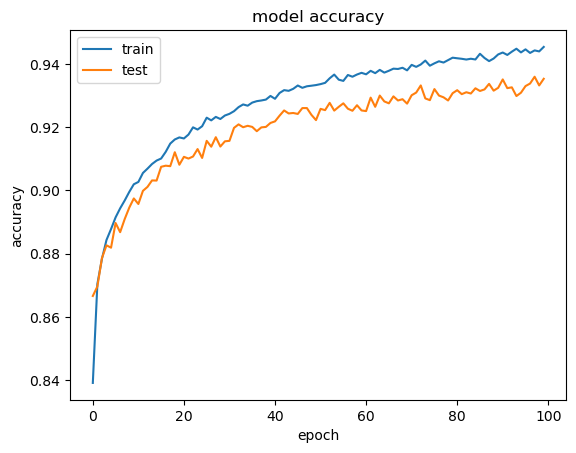

In [21]:
import matplotlib.pyplot as plt

plt.plot(classifierHistory.history['accuracy'])
plt.plot(classifierHistory.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
evaluation = classifier.evaluate(x_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])
y_pred = classifier.predict(x_test)

y_pred_binary = (y_pred > 0.5)

print(y_pred_binary)

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9355 - loss: 0.1996
Loss: 0.20524835586547852
Accuracy: 0.9353238940238953
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", round(100*accuracy,2))

precision = precision_score(y_test, y_pred_binary)
print("Precision:", round(100*precision,2))

recall = recall_score(y_test, y_pred_binary)
print("Recall:", round(100*recall,2))

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", round(100*f1,2))

Accuracy: 93.53
Precision: 89.91
Recall: 98.2
F1 Score: 93.88
